## 머신러닝이란?
### ●기계(머신)로 하여금 데이터를 학습하여 알고리즘을 만들어내도록 하는 방법

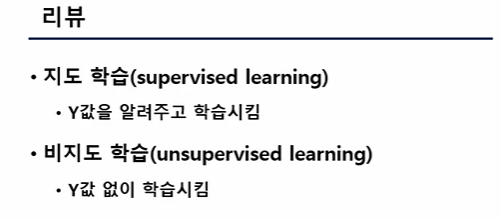

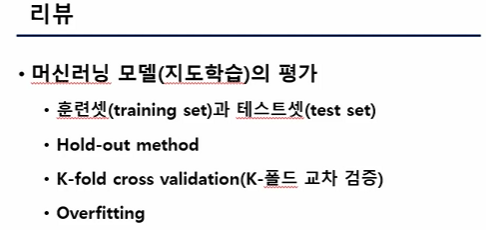

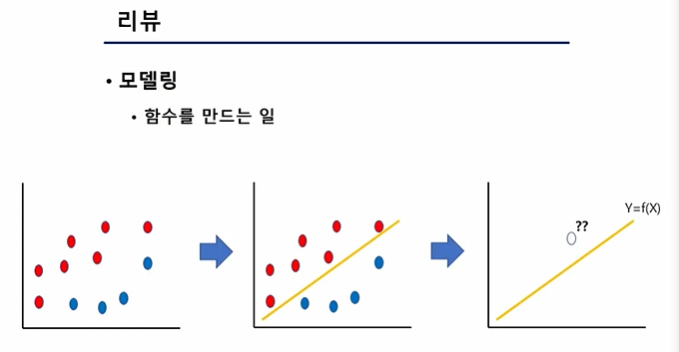

-----------------

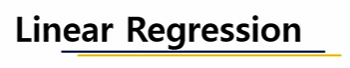

# 선형회귀 분석

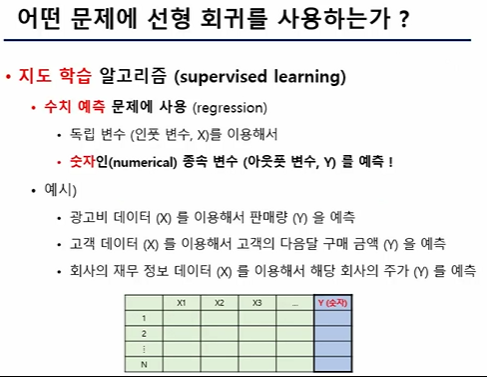

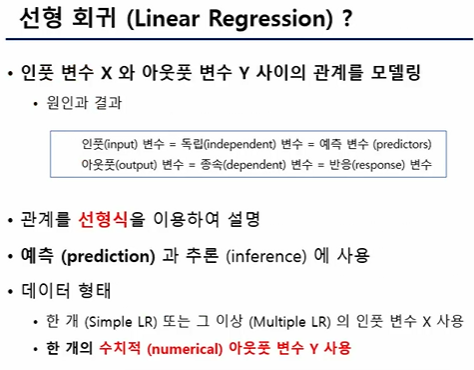

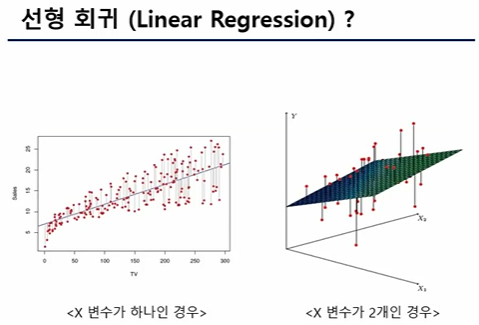

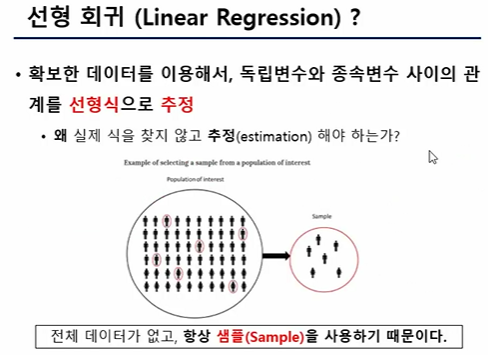

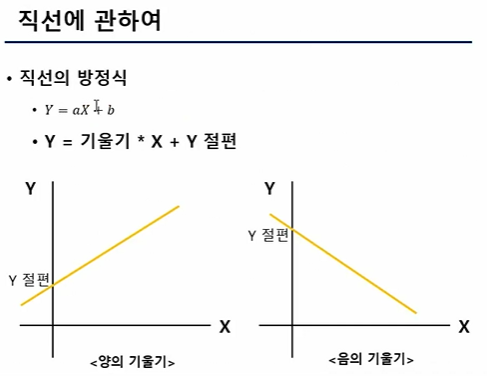

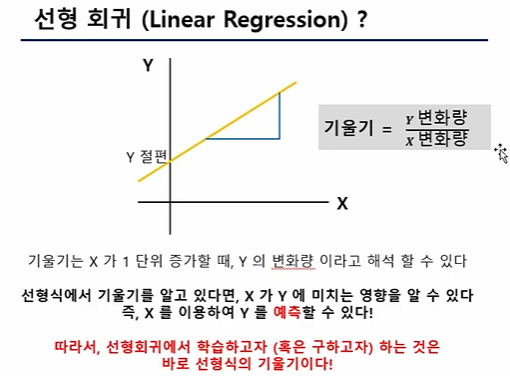

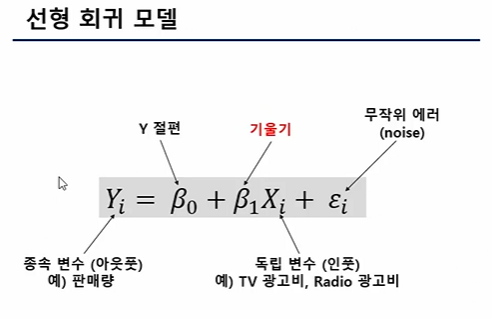

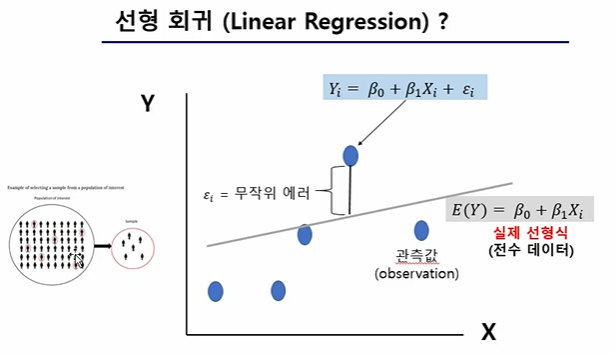

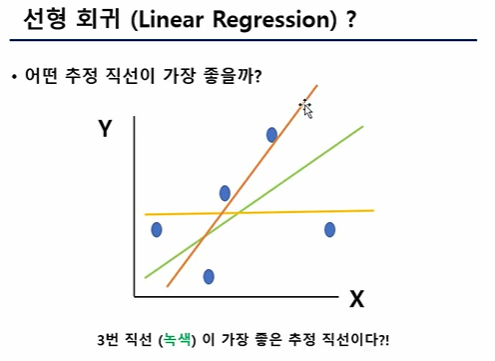

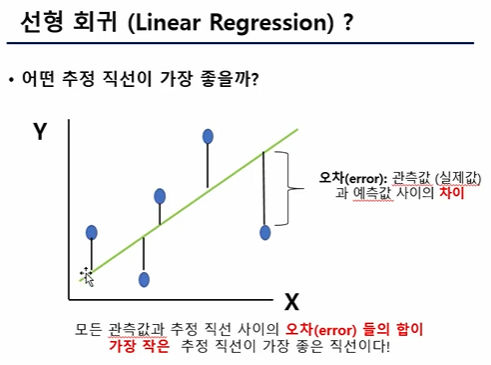

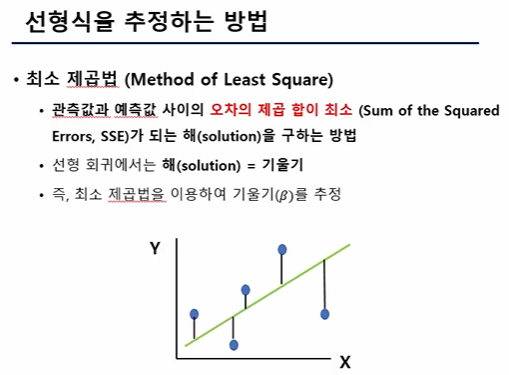

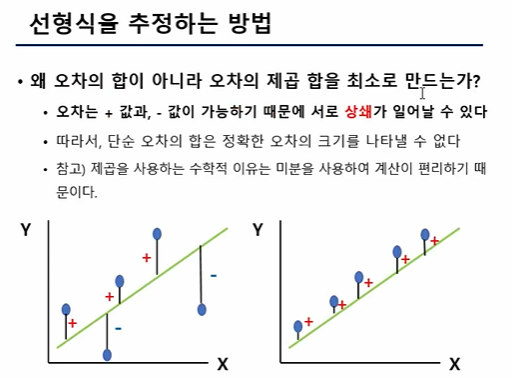

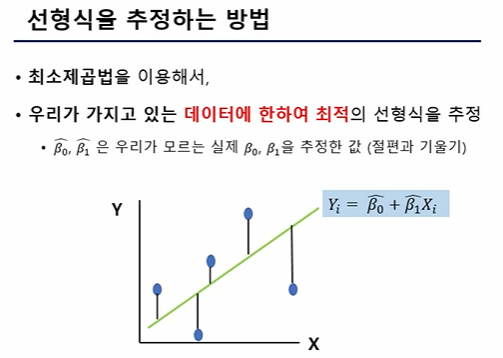

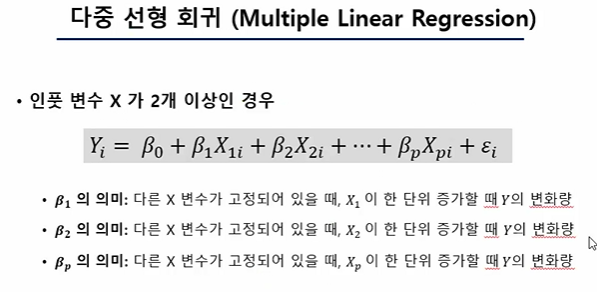

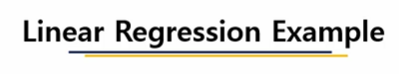

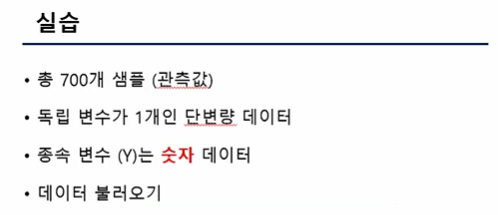

In [1]:
import pandas as pd

In [2]:
height = pd.read_csv("C:/Users/김동현/Desktop/2020 1학기/머신러닝/data/height.csv")

In [3]:
height

,Father,Son
0,165.1,151.9
1,165.1,160.8
2,167.1,159.5
3,155.2,163.3
4,160.0,163.1
...,...,...
694,177.3,174.8
695,181.4,176.5
696,180.6,177.0
697,167.6,177.8


In [6]:
type(height)

pandas.core.frame.DataFrame

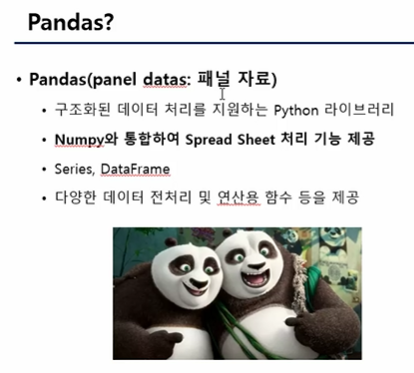

In [7]:
# 앞에 인덱스가 붙는다.
test = pd.Series(['a','b','c'])
test

0    a
1    b
2    c
dtype: object

In [9]:
type(test)

pandas.core.series.Series

In [10]:
data = {"name" : ['P','L','K'],
        "year" : [2000, 1998, 2001],
        "IQ" : [100, 110, 130]}

In [11]:
type(data)

dict

In [12]:
data

{'name': ['P', 'L', 'K'], 'year': [2000, 1998, 2001], 'IQ': [100, 110, 130]}

In [13]:
# 시리즈, 어레이, 딕셔너리도 데이터프레임 가능!
df = pd.DataFrame(data)
df

,name,year,IQ
0,P,2000,100
1,L,1998,110
2,K,2001,130


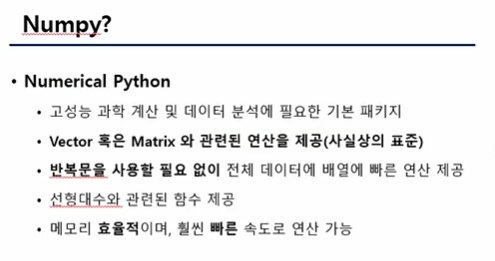

In [27]:
# C기반 라이브러리이기 때문에 속도가 빨라 빅데이터 분석에 효율적!

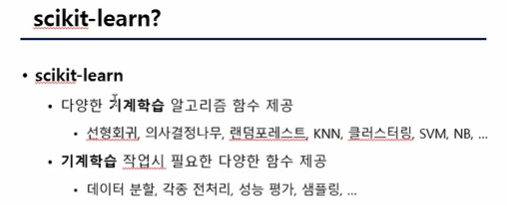

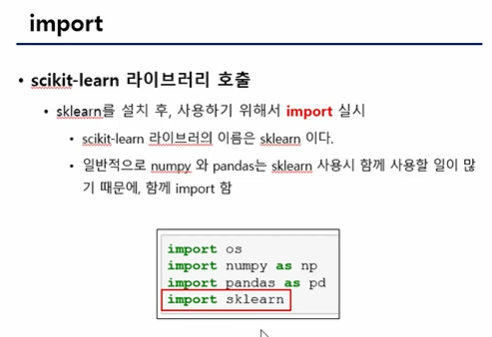

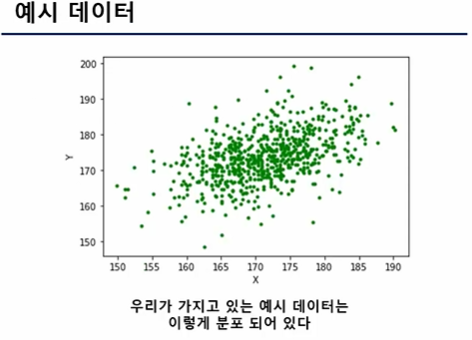

Text(0, 0.5, 'Son')

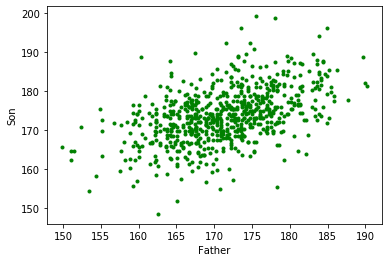

In [25]:
import matplotlib.pyplot as plt
X = height['Father']
Y = height['Son']
plt.plot(X,Y,'g.')#혹은 color = 'RGE컬러' 도 가능
plt.xlabel('Father')
plt.ylabel('Son')

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
# 70프로는 train 30프로는 test 로 쓰고 싶다면??

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 45)

Text(0, 0.5, 'Y_train')

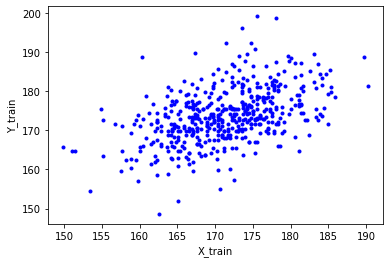

In [32]:
plt.plot(x_train, y_train, 'b.')
plt.xlabel('X_train')
plt.ylabel('Y_train')
# 전체 데이터의 70프로만 사용

In [31]:
x_train

82     172.0
258    173.5
237    172.5
227    184.2
39     167.4
       ...  
163    165.1
607    166.6
544    177.3
643    168.9
414    176.5
Name: Father, Length: 489, dtype: float64

In [33]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# coef는 기울기  intercept는 y절편
[lr.coef_,lr.intercept_]

[array([0.50234469]), 87.72076335132297]

In [35]:
f = lambda x: lr.intercept_ + (lr.coef_ * x)

import numpy as np

In [36]:
x = np.array([min(x_train), max(x_train)])

In [40]:
x

array([149.9, 190.2])

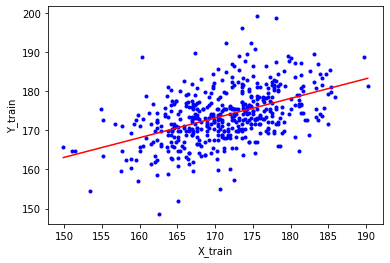

In [37]:
# train data set
plt.plot(x_train, y_train, 'b.')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.plot(x, f(x), color = 'r')

In [38]:
x = np.array([min(x_test), max(x_test)])

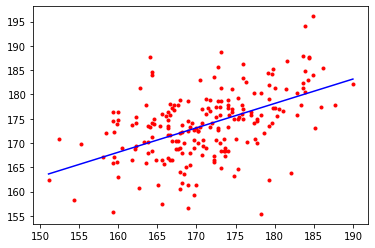

In [39]:
# test data set
plt.plot(x_test, y_test, '.', color ='r')
plt.plot(x, f(x), color = 'blue')

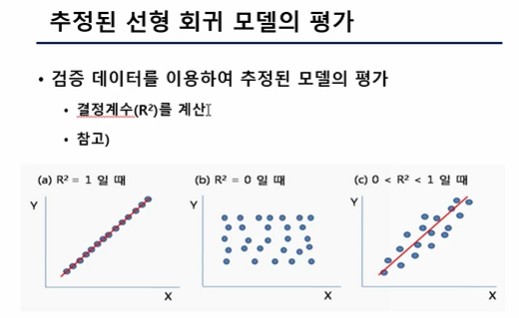

In [40]:
# 결정계수 값
lr.score(x_test.values.reshape(-1,1),y_test)

0.23248201752310116

In [41]:
lr.score(x_train.values.reshape(-1,1),y_train)

0.22612660744551438

---------------------

# 머신러닝 10주차 과제

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# train이라는 변수명으로 아파트 실거래 가격 데이터를 불러옵니다.
train = pd.read_csv("C:/Users/Kim/Desktop/빅데이터분석/COIN-2020/data/아파트실거래가dataset/4th_Competition/train.csv")

In [44]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
train.shape

(1216553, 13)

In [45]:
# train 데이터프레임의 설명입니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

Text(0, 0.5, 'transaction_real_price')

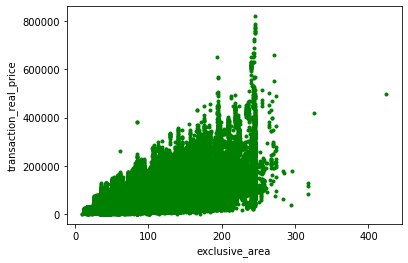

In [6]:
# 아파트 실거래 가격과 실용면적을 이용해 데이터의 분포도를 알아보겠습니다.

X = train['exclusive_use_area']
Y = train['transaction_real_price']
plt.plot(X,Y,'g.')
plt.xlabel('exclusive_area')
plt.ylabel('transaction_real_price')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 50)

In [14]:
print(len(x_train), len(x_test))

851587 364966


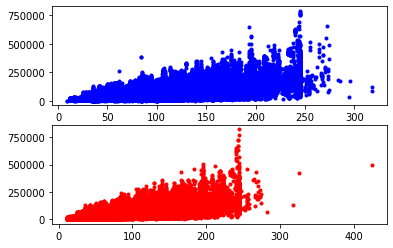

In [28]:
# 전체 데이터의 70%를 사용한 분포도 입니다.

fig, axes = plt.subplots(2, 1)

axes[0].plot(x_train, y_train, 'b.')
axes[1].plot(x_test, y_test, 'r.')

Text(0, 0.5, 'test_transaction_real_price')

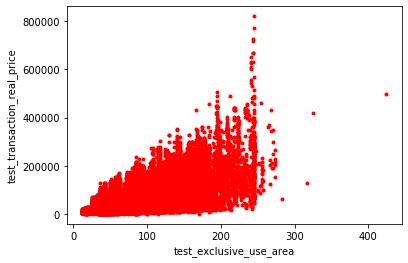

In [49]:
# 전체 데이터의 30% 를 사용한 분포도 입니다.
plt.plot(x_test, y_test, 'r.')
plt.xlabel('test_exclusive_use_area')
plt.ylabel('test_transaction_real_price')

In [29]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
[lr.coef_,lr.intercept_]

[array([596.7088741]), -8433.665990978763]

In [31]:
f = lambda x: lr.intercept_ + (lr.coef_ * x)

import numpy as np

In [32]:
x = np.array([min(x_train), max(x_train)])

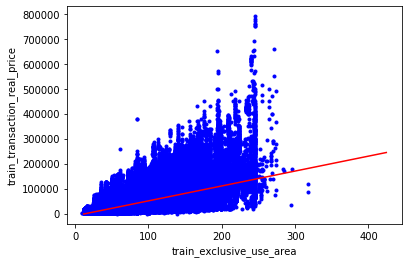

In [50]:
# train data set
plt.plot(x_train, y_train, 'b.')
plt.xlabel('train_exclusive_use_area')
plt.ylabel('train_transaction_real_price')
plt.plot(x, f(x), color = 'r')

In [34]:
x = np.array([min(x_test), max(x_test)])

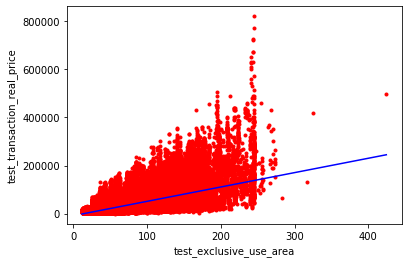

In [51]:
# test data set
plt.plot(x_test, y_test, '.', color ='r')
plt.xlabel('test_exclusive_use_area')
plt.ylabel('test_transaction_real_price')
plt.plot(x, f(x), color = 'blue')

In [36]:
# 결정계수 값
lr.score(x_train.values.reshape(-1,1),y_train)

0.3148295368852634

In [37]:
# 결정계수 값
lr.score(x_test.values.reshape(-1,1),y_test)

0.3165584782458567

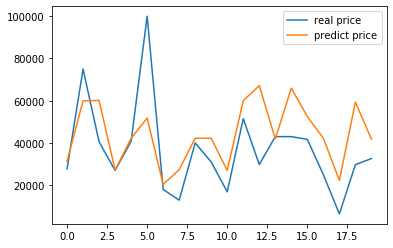

In [47]:
plt.plot(y_test[:20].values.reshape(-1, 1), label="real price")
plt.plot(lr.predict(x_test[:20].values.reshape(-1,1)), label="predict price")
plt.legend()

In [60]:
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.formula.api as smf

In [61]:
# OLS를 사용하여 회귀분석 모델을 생성합니다.
model = smf.ols(formula = 'exclusive_use_area ~ transaction_real_price', data = train)
results = model.fit()

In [62]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     exclusive_use_area   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                 5.604e+05
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:40   Log-Likelihood:            -5.5986e+06
No. Observations:             1216553   AIC:                         1.120e+07
Df Residuals:                 1216551   BIC:                         1.120e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 58